# 2 - Analyse exploratoire

In [1]:
# Définition du chemin d'accès
import os
#os.chdir('/Users/pierredesmet/Documents/Documents Word/Etudes/UTT/ENSAE/Python pour le Data Scientist')
os.chdir('C:\\Users\\Alexis\\Google Drive\\Documents\\ENSAE\\Semestre 1\\Projet python\\')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sci
from matplotlib import style
style.use("ggplot")
from importation import *

# Démarrer pylab en ligne de commande, afin que les figures apparaissent dans le notebook.
%matplotlib inline

Au cours de ce notebook, nous allons explorer à la main les données afin de mieux comprendre les charactéristiques principales des courses de taxi à New York.

## Description du jeu de données

|     Variable     |                                                                                  Description                                                                                 |
|:----------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------:|
| ``medallion``        | Code obligatoire pour prendre des passagers dans la rue à NYC. Limité à environ 13000 taxis en circulation à un instant t.                                                   |
| ``hack_license``     | Numéro de licence (anonymisé) pour chaque taxi driver                                                                                                                        |
| ``vendor_id``        | A code indicating the LPEP provider that provided the record.,1= Creative Mobile Technologies, LLC; 2= VeriFone Inc.application de paiement de la course (tiers de paiement) |
| ``rate_code``        | The final rate code in effect at the end of the trip.1= Standard rate2=JFK3=Newark4=Nassau or Westchester 5=Negotiated fare 6=Group ride                                     |
| ``pickup_datetime``  | L'heure à laquelle le passager a embarqué à bord du taxi                                                                                                                     |
| ``dropoff_datetime`` | L'heure à laquelle le passager a débarqué à bord du taxi                                                                                                                     |
| ``passenger_count`` | Le nombre de passagers transportés par le taxi                                                                                                                     |
| ``trip_time_in_secs`` | Le temps de la course en secondes                                                                                                                     |
| ``trip_distance`` | La distance parcourue par le taxi durant la course                                                                                                                     |
| ``pickup_longitude``| La longitude à laquelle le taxi a été géolocalisé au moment où le(s) passager(s) est/sont monté(s) |
| ``pickup_latitude``| La latitude à laquelle le taxi a été géolocalisé |

## Statistiques descriptives

Dans un premier temps, il paraît judicieux d'obtenir des **informations générales** sur le dataset : le nombre d'observations ainsi que le type des variables auxquelles nous seront confrontés.

In [2]:
trip = chargement_donnees()
trip = clean(trip)
print(trip.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 725673 entries, 0 to 865885
Data columns (total 20 columns):
medallion            725673 non-null object
hack_license         725673 non-null object
vendor_id            725673 non-null object
pickup_datetime      725673 non-null datetime64[ns]
payment_type         725673 non-null object
fare_amount          725673 non-null float64
surcharge            725673 non-null float64
tip_amount           725673 non-null float64
tolls_amount         725673 non-null float64
total_amount         725673 non-null float64
dropoff_datetime     725673 non-null datetime64[ns]
passenger_count      725673 non-null int64
trip_time_in_secs    725673 non-null int64
trip_distance        725673 non-null float64
pickup_longitude     725673 non-null float64
pickup_lattitude     725673 non-null float64
dropoff_longitude    725673 non-null float64
dropoff_lattitude    725673 non-null float64
nuit_jour            725673 non-null object
jour_semaine         725673 n

L'échantillon que nous nous proposons d'analyser est composé de 725673 courses, décrites par 20 variables, et ne contient pas de valeur manquante.
Nous avons ensuite calculé les **agrégats statistiques** usuels : moyenne, écart-type, quantiles etc. 

In [3]:
print("Nombre de taxis : %d" %len(set(trip.medallion))) # np.unique plus lent que set
print("Nombre de courses : %d\n" %len(set(trip.index)))
print(trip.describe()) # agrégats statistiques usuels
trip.head()

Nombre de taxis : 13408
Nombre de courses : 725673

         fare_amount      surcharge     tip_amount   tolls_amount  \
count  725673.000000  725673.000000  725673.000000  725673.000000   
mean       10.328490       0.325520       1.143371       0.119770   
std         5.966231       0.364722       1.547079       0.789427   
min         3.000000       0.000000       0.000000       0.000000   
25%         6.500000       0.000000       0.000000       0.000000   
50%         8.500000       0.000000       1.000000       0.000000   
75%        12.500000       0.500000       1.900000       0.000000   
max        66.000000       2.320000      70.000000      17.770000   

        total_amount  passenger_count  trip_time_in_secs  trip_distance  \
count  725673.000000    725673.000000      725673.000000  725673.000000   
mean       12.417192         1.708797         674.535434       2.198440   
std         7.305582         1.375364         440.366688       1.933757   
min         3.700000      

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,tip_amount,tolls_amount,total_amount,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_lattitude,dropoff_longitude,dropoff_lattitude,nuit_jour,jour_semaine
0,D5367E940A20B9D2550BF7CF7AE01681,5B34A2589D1D2106FC0C47564A4833F0,CMT,2013-01-08 12:50:22,CSH,7.5,0.0,0.0,0.0,8.0,2013-01-08 12:58:39,2,496,1.10,-73.952026,40.766479,-73.966827,40.759968,jour,Tuesday
1,69F42CD1BA72F0F090E85F299C7B6301,65BABDDBC94F4C1AA996FA693E4D4F57,VTS,2013-01-13 11:09:00,CRD,5.0,0.0,1.0,0.0,6.5,2013-01-13 11:13:00,1,240,0.57,-73.999786,40.728497,-73.994179,40.724926,jour,Sunday
2,F0C1205FC27DF89D8C9F8DC2F324E36C,FAA39BEB7D7159DCB3DCAC56EED0CEA7,VTS,2013-01-13 10:28:00,CSH,4.5,0.0,0.0,0.0,5.0,2013-01-13 10:31:00,5,180,0.61,-73.978935,40.784966,-73.971329,40.786163,jour,Sunday
3,3112FC4E5C14054B8A5DB00037572C70,9F959826431402B410E0B8FA23160AFE,VTS,2013-01-13 10:32:00,CSH,5.5,0.0,0.0,0.0,6.0,2013-01-13 10:35:00,5,180,1.28,-73.960541,40.762005,-73.950432,40.776211,jour,Sunday
5,C852FCF8AFF847126AF8A109DE44BB1F,DFF8F13106E8C8C3773DE379678334E3,VTS,2013-01-13 06:28:00,CSH,8.0,0.0,0.0,0.0,8.5,2013-01-13 06:36:00,1,480,1.75,-73.986214,40.726437,-73.978065,40.745602,nuit,Sunday


## Exploration visuelle

### Quelle durée pour les courses de taxis ?
Pour enrichir la phase de statistique descriptive, nous avons produit plusieurs **graphiques**.
À commencer par l'histogramme de la distribution des distances des courses :

75% des courses durent moins de 885 secondes (14.75 minutes)


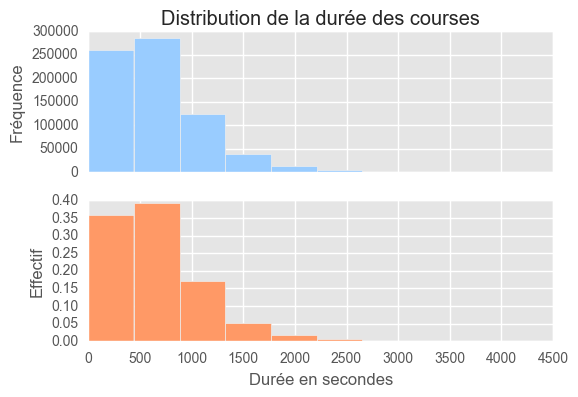

In [4]:
f, ax = plt.subplots(2,sharex = True)
weights = np.ones_like(trip["trip_time_in_secs"])/float(len(trip["trip_time_in_secs"]))
ax[0].hist(trip["trip_time_in_secs"],color = "#99CCFF")
ax[0].set_title("Distribution de la durée des courses")
ax[0].set_ylabel("Fréquence")
ax[1].hist(trip["trip_time_in_secs"],color = "#FF9966",weights=weights)
plt.xlabel("Durée en secondes")
plt.ylabel("Effectif")

q75 = trip.trip_time_in_secs.quantile(0.75)
freq_courses_sub_1000 = len(trip[trip.trip_time_in_secs < 960])/len(trip)
print("75%% des courses durent moins de %d secondes (%.2f minutes)"%(q75,q75/60))

On remarque que la plupart des courses durent moins de 1000 secondes, soit à peu près un quart d'heure.

### Le montant de la course influence-t-il le mode de paiement ?

On souhaite ensuite mettre en évidence un lien éventuel entre le montant de la course et le moyen de paiement. On soupçonne en effet que le paiement par carte bleue se substitue au paiement en espèce à partir d'un certain montant.

C:\Users\Alexis\Anaconda3\lib\site-packages\seaborn\categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


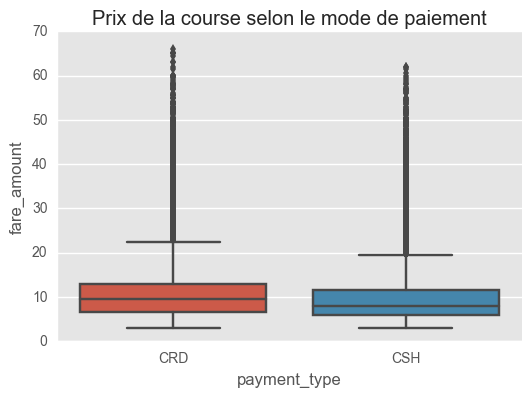

In [5]:
# Avec Seaborn
sns.boxplot( trip.fare_amount, groupby = trip.payment_type, order = ["CRD","CSH"])
sns.plt.title('Prix de la course selon le mode de paiement')
sns.despine()

Contrairement à notre intuition initiale, le montant ne semble pas avoir d'influence sur le choix du mode de paiement des passagers ; en effet, l'inspection visuelle ne révèle pas de différence flagrante de la distribution du prix dans les deux groupes.

À priori, le paiement s'effectue donc indifféremment en espèce et par carte de crédit. On va chercher à le vérifier à l'aide d'un test d'égalité des moyennes dans les deux groupes. 

Prix moyen des courses payées par carte : 9.63
Prix moyen des courses payées en espèces : 10.92


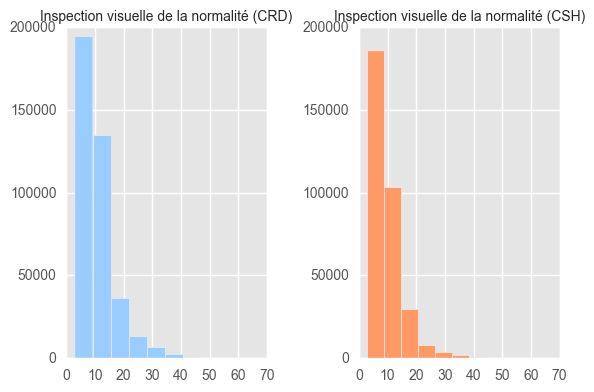

In [6]:
groupe_CSH = trip.fare_amount[trip.payment_type == "CSH"]
groupe_CRD = trip.fare_amount[trip.payment_type == "CRD"]
print("Prix moyen des courses payées par carte : %2.2f"%np.mean(groupe_CSH))
print("Prix moyen des courses payées en espèces : %2.2f"%np.mean(groupe_CRD))

# Inspection visuelle des variables
histo,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(groupe_CRD,color = "#99CCFF")
ax1.set_title("Inspection visuelle de la normalité (CRD)", fontsize = 10)
ax2.hist(groupe_CSH,color = "#FF9966") 
ax2.set_title("Inspection visuelle de la normalité (CSH)", fontsize = 10)
plt.tight_layout()

Les variables n'ont pas l'air de suivre une distribution gausienne, mais plutôt une log-normale. On se propose donc de passer au logarithme dans un premier temps afin d'obtenir la normalité.

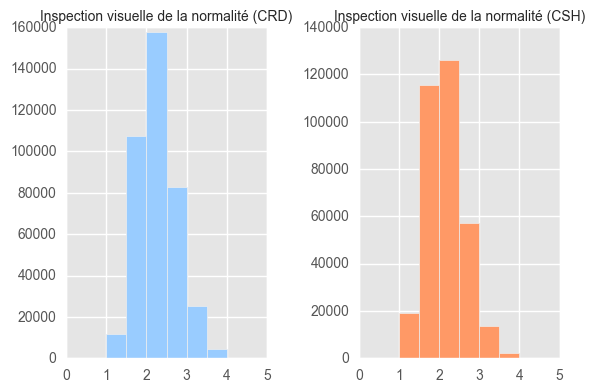

In [7]:
# Transformation des données pour obtenir la normalité
ln_groupe_CRD = np.log(groupe_CRD)
ln_groupe_CSH = np.log(groupe_CSH)

histo,(ax1,ax2) = plt.subplots(1,2)
ax1.hist(ln_groupe_CRD,color = "#99CCFF",range = (0,5))
ax1.set_title("Inspection visuelle de la normalité (CRD)", fontsize = 10)
ax2.hist(ln_groupe_CSH,color = "#FF9966",range = (0,5))
ax2.set_title("Inspection visuelle de la normalité (CSH)", fontsize = 10)
plt.tight_layout()

Les variables semblent s'approcher davantage de lois normales. En plus de l'inspection visuelle, on peut le vérifier de trois façons :
- en calculant le Skewness
- en calculant le Kurtosis
- avec le test de Jacque-Berra

On espère que le kurtosis vaut 0, la loi normale étant mésokurtique. De même, le skewness devrait être proche de 0.


In [8]:
print("CRD : \n\tskewness = %f \n\tkurtosis = %f\n\tP-value J-B test : %s" %(ln_groupe_CRD.skew(),ln_groupe_CRD.kurtosis(),sci.stats.jarque_bera(ln_groupe_CSH)))
print("CSH : \n\tskewness = %f \n\tkurtosis = %f\n\tP-value J-B test : %s" %(ln_groupe_CSH.skew(),ln_groupe_CSH.kurtosis(),sci.stats.jarque_bera(ln_groupe_CRD)))

CRD : 
	skewness = 0.427878 
	kurtosis = -0.022341
	P-value J-B test : (12964.294625137924, 0.0)
CSH : 
	skewness = 0.482076 
	kurtosis = 0.051559
	P-value J-B test : (11898.744347356847, 0.0)


L'hypothèse de normalité est rejetée : un skewness élevé traduit une distribution dissymétrique, et le test de Jarque-Berra conclue à la non-normalité. 

Notre test ne pourra pas s'appuyer sur cette hypothèse pour comparer les prix moyens des courses réglées en espèces et par carte bleue. Le test à mettre en place doit donc être non paramétrique. On choisit par exemple le test de Mann-Whitney disponible dans le package Scipy : 

In [9]:
print(sci.stats.mannwhitneyu(groupe_CSH,groupe_CRD))

MannwhitneyuResult(statistic=55767377704.5, pvalue=0.0)


La p-valeur étant inférieure à 1%, on rejette à ce risque l'hypothèse (H0) : le montant de la course n'influence pas le moyen de paiement. Les courses ayant un montant élevé ont tendance à être davantage payées en espèces.

### Influence du mois sur le nombre de courses
On s'intéresse ensuite au nombre global de courses effectuées par les taxis au cours du mois : certains mois connaissent-ils plus de trafic ?

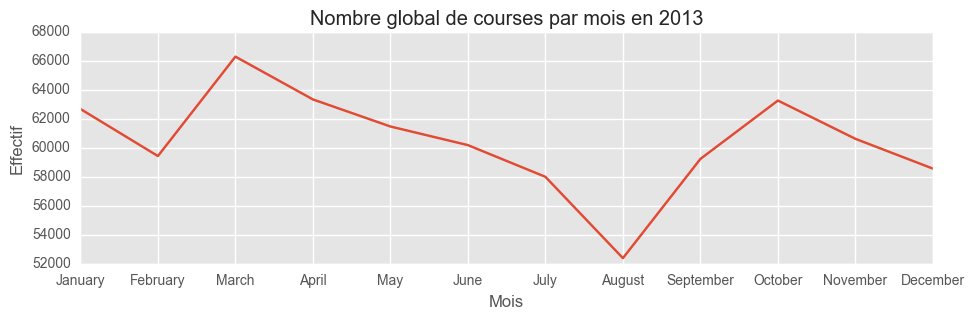

In [10]:
import calendar
x = list(set(pd.DatetimeIndex(trip.pickup_datetime).month))
y = trip['medallion'].groupby(pd.DatetimeIndex(trip.pickup_datetime).month).count()
fig = plt.figure(figsize=(11,3))
ax = fig.add_subplot(1,1,1)
ax.plot(x,y,'-')
plt.title("Nombre global de courses par mois en 2013")
plt.xlabel("Mois")
plt.xlim(1,12)
plt.xticks(np.arange(1,13), calendar.month_name[1:13])
plt.ylabel("Effectif")

On constate un pic de fréquentation des taxis en mars, et une baisse de fréquentation pour août. Celui-ci pourrait s'expliquer par exemple par le départ en vacances des résidents New-Yorkais, potentiellement non compensé par la présence des touristes.

### Influence du jour du mois sur le nombre de courses
Rentrons à présent dans le détail pour chaque mois ; comment se répartissent les courses au sein d'un même mois ? Les distributions diffèrent-elles d'un mois à l'autre ?

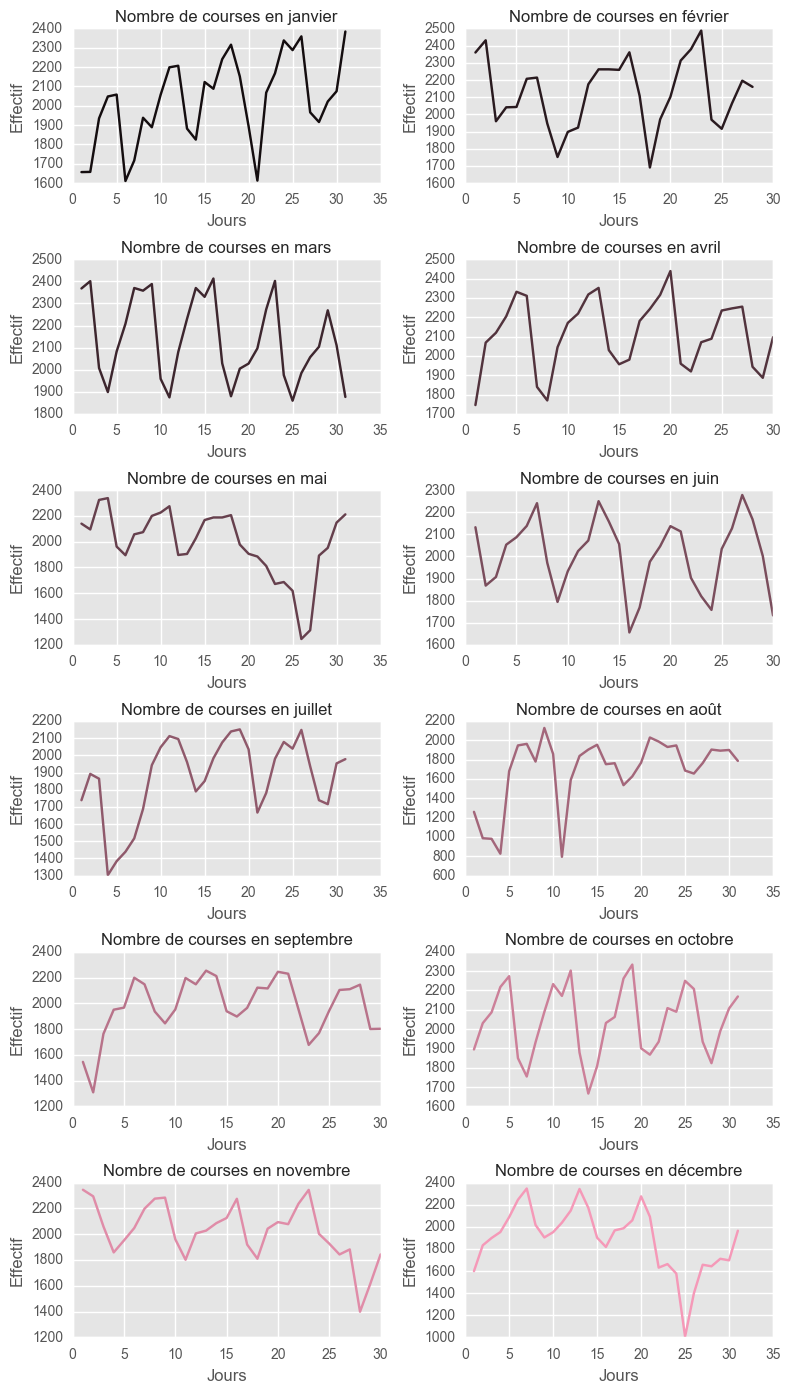

In [11]:
mois = ["janvier","février","mars","avril","mai","juin","juillet","août","septembre","octobre","novembre","décembre"]
def plot_courses_mois():
    fig = plt.figure(figsize=(8,14))
    for m in range(1,len(mois)+1):
        courses_mois = trip[pd.DatetimeIndex(trip.pickup_datetime).month == m]
        x = list(set(pd.DatetimeIndex(courses_mois.pickup_datetime).day))
        y = courses_mois['medallion'].groupby(pd.DatetimeIndex(courses_mois.pickup_datetime).day).count()
        ax = fig.add_subplot(6,2,m)
        ax.plot(x,y,'-',color=(0.08*m,0.05*m,0.06*m))
        plt.title("Nombre de courses en %s"%mois[m-1],fontsize = 12)
        plt.xlabel("Jours")
        plt.ylabel("Effectif")
        plt.tight_layout()
plot_courses_mois()

Trois constats émanent de ces graphiques ;
- il existe des fluctuations de fréquentation au sein même des mois ;
- aucun "pic" significatif de fréquentation n'apparaît cependant : aucun évènement n'a poussé les individus à augmenter leur fréquentation de taxis ;
- à l'inverse, on observe des creux de fréquentation ponctuels. Ceux-ci correspondent par exemple au Martin Luther King's Day (21 janvier), au Jour de l'Indépendance (4 juillet), à Thanksgiving (28 novembre) et à Noël (25 décembre). 

### Influence du jour de la semaine sur le nombre de courses
Enfin, il peut être intéressant de comparer le nombre de courses suivant les jours de la semaine ; certains jours de semaine connaissent-ils systématiquement plus de courses que les autres ? Existe-il des différences selon que l'on est en semaine ou le week-end ?

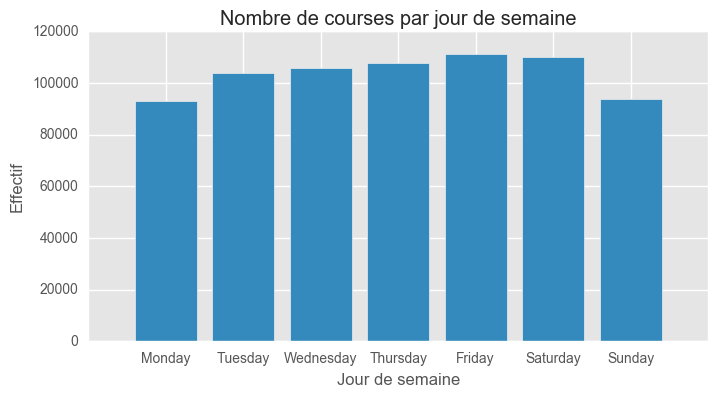

In [12]:
y = trip.groupby(trip.jour_semaine).count()
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1,1,1)
ax.bar([5,1,6,7,4,2,3],y.medallion,tick_label = y.index, align = "center")
plt.title("Nombre de courses par jour de semaine")
plt.xlabel("Jour de semaine")
plt.ylabel("Effectif")

Les jours à forte affluence sont le vendredi et le samedi. _A contrario_, les lundi et dimanche voient généralement se dérouler moins de courses de taxis.

## Représentation spatiale

Nous souhaitons enfin représenter les taxis selon leur localisation au début et à la fin de la course. À cet effet nous allons utiliser les variables `pickup_longitude` et `pickup_lattitude` (resp. `dropoff_logitude` et `dropoff_lattitude`). 

On constitue (arbitrairement) **3 groupes de courses** : celles qui n'ont pas bénéficié de pourboire, celles dont le pourboire était inférieur à 10$ et celles dont le montant était supérieur. 

In [13]:
def couleur_tip(tip): 
    if(tip == 0):
        return 'orange'
    elif(tip > 10):
        return 'black'
    return 'red'

def dt_to_heure(dt): 
    return dt.hour

trip['couleur'] = trip['tip_amount'].apply(couleur_tip)
trip['pickup_heure'] = trip['pickup_datetime'].apply(dt_to_heure)

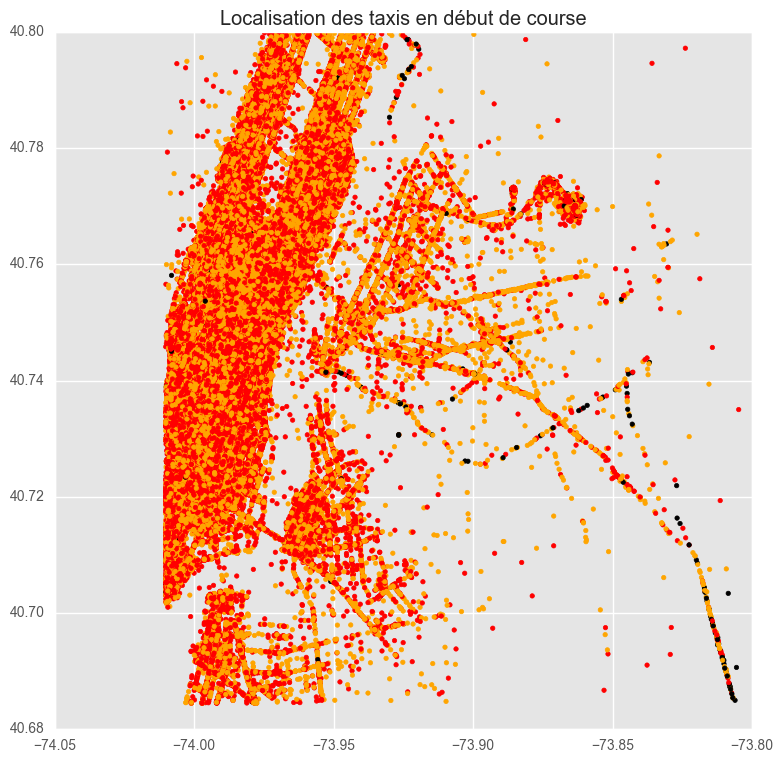

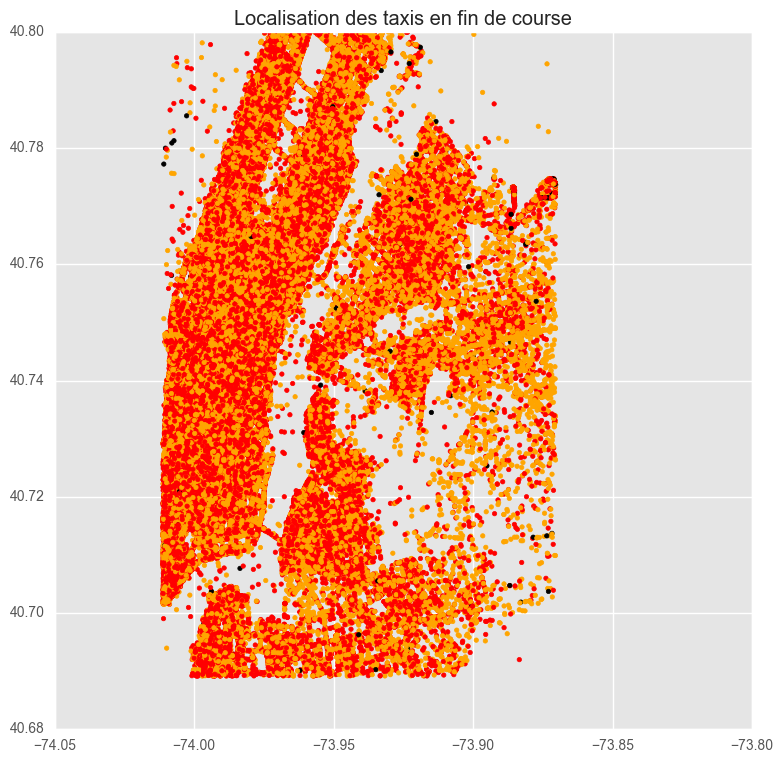

In [14]:
# En début de course 
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.set_xlim([-74.05,-73.80])
ax.set_ylim([40.68,40.80])
ax.scatter(trip['pickup_longitude'],trip['pickup_lattitude'],color = trip['couleur'],s=10)
plt.title("Localisation des taxis en début de course")
    
    
# En fin de course 
fig = plt.figure(figsize=(9,9))
ax = fig.add_subplot(111)
ax.set_xlim([-74.05,-73.80])
ax.set_ylim([40.68,40.80])
ax.scatter(trip['dropoff_longitude'],trip['dropoff_lattitude'],color = trip['couleur'],s=10)
plt.title("Localisation des taxis en fin de course")

<img src="http://www.vazyvite.com/photo_div/newyork/new-york-city-plan-map.gif" alt="NYC_map" style="width:500px;height:500px;">
On remarque que les gens ont plus tendance à monter dans un taxis au coeur de New-York pour se faire déposer en banlieu, l'inverse étant plus rare. Les courses se font globalement de l'ouest vers l'est.

Les courses rapportant les plus gros pourboires sont celles qui commencent dans le quartier et celles qui s'achèvent dans le quartier de Midtown